### IMPORT PACKAGES

In [1]:
try:
    %load_ext autotime
except:
    !pip install ipython-autotime
    %load_ext autotime

time: 3.28 ms (started: 2021-10-08 07:04:20 +00:00)


In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
#from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

time: 874 ms (started: 2021-10-08 07:04:23 +00:00)


-----

## **LOAD & DESCRIBE DATA**

In [10]:
train = pd.read_csv('data_preprocessed_load_prediction_fix.csv')
train.head()

,age,experience,marital_status,car_ownership,current_job_yrs,current_house_yrs,income_norm,house_ownership_norent_noown,house_ownership_owned,house_ownership_rented,profession_assistant_science_engineering,profession_business_administration,profession_firefighter,profession_government,profession_health,profession_hotel_manager,profession_individual_business_personnel,profession_information_communication_technology,profession_law_social_culture,profession_military_and_police,profession_science_engineering,profession_secretary,state_andhra pradesh,state_bihar,state_madhya pradesh,state_maharashtra,state_other,state_tamil nadu,state_uttar pradesh,state_west bengal,risk_flag
0,23,3,0,0,3,13,0.129487,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,40,10,0,0,9,13,0.757206,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,66,4,1,0,4,10,0.398564,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,41,2,0,1,2,12,0.625263,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
4,47,11,0,0,3,14,0.576454,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


time: 173 ms (started: 2021-10-08 07:05:08 +00:00)


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67444 entries, 0 to 67443
Data columns (total 31 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   age                                              67444 non-null  int64  
 1   experience                                       67444 non-null  int64  
 2   marital_status                                   67444 non-null  int64  
 3   car_ownership                                    67444 non-null  int64  
 4   current_job_yrs                                  67444 non-null  int64  
 5   current_house_yrs                                67444 non-null  int64  
 6   income_norm                                      67444 non-null  float64
 7   house_ownership_norent_noown                     67444 non-null  int64  
 8   house_ownership_owned                            67444 non-null  int64  
 9   house_ownership_rented      

-------

## **SPLIT TRAIN-VALIDATION**

In [12]:
x = train.drop(columns=['risk_flag'])
y = train['risk_flag']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

time: 38.7 ms (started: 2021-10-08 07:05:15 +00:00)


In [14]:
X_train.shape

(47210, 30)

time: 7.01 ms (started: 2021-10-08 07:05:27 +00:00)


In [15]:
X_test.shape

(20234, 30)

time: 8.51 ms (started: 2021-10-08 07:05:36 +00:00)


In [16]:
y_train.shape

(47210,)

time: 5.7 ms (started: 2021-10-08 07:05:42 +00:00)


In [17]:
y_test.shape

(20234,)

time: 3.49 ms (started: 2021-10-08 07:05:44 +00:00)


--------

## **MODELLING**

In [18]:
def eval_classification(model, pred, proba, X_train, y_train, X_test, y_test):
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, pred))
    
    fpr, tpr, thresholds = roc_curve(y_test, proba, pos_label=1)
    print("AUC: %.2f" % auc(fpr, tpr))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

time: 16.1 ms (started: 2021-10-08 07:05:48 +00:00)


### DECISION TREE

In [19]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)
y_proba = dt.predict_proba(X_test)
y_proba = y_proba[:,1]

eval_classification(dt, y_pred, y_proba, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.77
Precision (Test Set): 0.76
Recall (Test Set): 0.79
F1-Score (Test Set): 0.77
AUC: 0.77
time: 382 ms (started: 2021-10-08 07:05:50 +00:00)


In [20]:
print('Train score: ' + str(dt.score(X_train, y_train))) #accuracy
print('Test score:' + str(dt.score(X_test, y_test))) #accuracy

Train score: 1.0
Test score:0.7690026687753286
time: 38.4 ms (started: 2021-10-08 07:05:57 +00:00)


Text(0.5, 1.0, 'feature importance score')

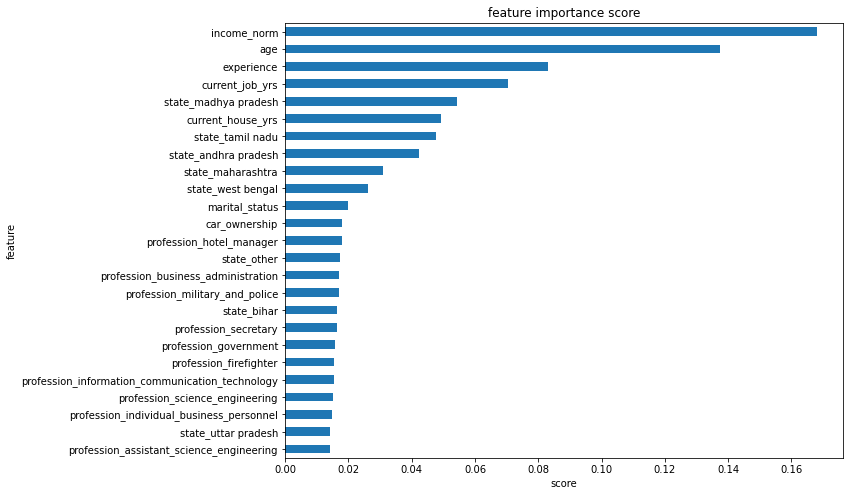

time: 413 ms (started: 2021-10-08 07:06:01 +00:00)


In [21]:
feat_importances = pd.Series(dt.feature_importances_, index=x.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

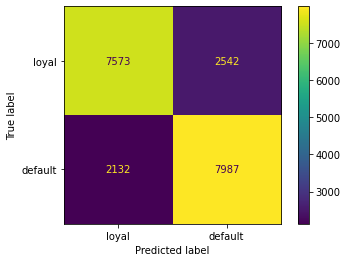

time: 211 ms (started: 2021-10-08 07:06:08 +00:00)


In [22]:
plot_confusion_matrix(dt,
                      X_test,
                      y_test,
                      values_format='d',
                      display_labels=['loyal','default']
                     )

Cara baca Confusion Matrix di atas:
- True Positive = 7987 (sebenarnya defaulter, diprediksi sebagai defaulter)
- False Positive = 2542 (sebenarnya bukan defaulter, diprediksi sebagai defaulter)
- True Negative = 7573 (sebenarnya bukan defaulter, diprediksi sebagai bukan defaulter)
- False Negative = 2132 (sebenarnya defaulter, diprediksi sebagai bukan defaulter)

#### TUNING HYPERPARAMETER - DT

In [23]:
hyperparameters = dict(criterion=['gini'],
                       splitter=['best'],
                       max_depth=[int(x) for x in np.linspace(start = 10, stop = 20, num =11)]
                      )

dt = DecisionTreeClassifier(random_state=42)
gs_dt = GridSearchCV(dt, hyperparameters, cv=5, scoring='recall')
gs_dt.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini'],
                         'max_de

time: 12.2 s (started: 2021-10-08 07:06:40 +00:00)


In [24]:
y_pred = gs_dt.predict(X_test)
y_proba = gs_dt.predict_proba(X_test)
y_proba = y_proba[:,1]

eval_classification(gs_dt, y_pred, y_proba, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.77
Precision (Test Set): 0.78
Recall (Test Set): 0.76
F1-Score (Test Set): 0.77
AUC: 0.80
time: 62.9 ms (started: 2021-10-08 07:06:56 +00:00)


In [25]:
show_best_hyperparameter(gs_dt.best_estimator_, hyperparameters)

Best criterion: gini
Best splitter: best
Best max_depth: 20
time: 4.87 ms (started: 2021-10-08 07:07:00 +00:00)


In [26]:
print('Train score: ' + str(gs_dt.score(X_train, y_train)))
print('Test score:' + str(gs_dt.score(X_test, y_test)))

Train score: 0.9176375884421472
Test score:0.7602529894258326
time: 62.4 ms (started: 2021-10-08 07:07:02 +00:00)


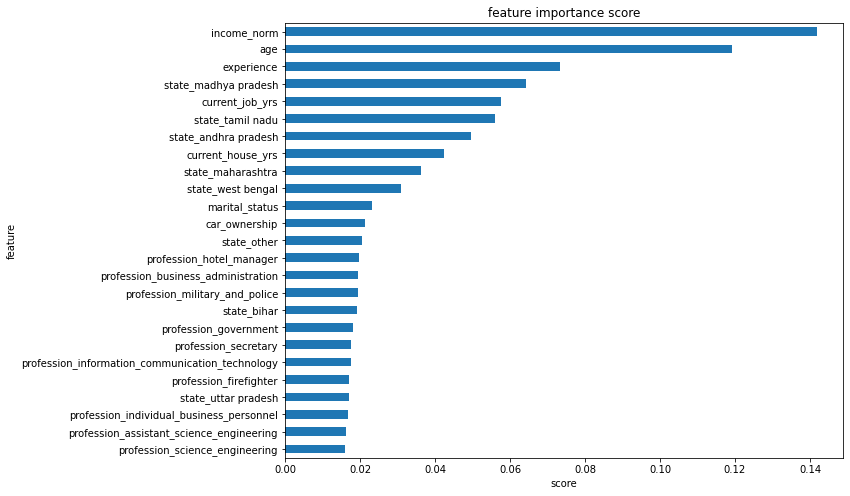

time: 364 ms (started: 2021-10-08 07:07:04 +00:00)


In [27]:
show_feature_importance(gs_dt.best_estimator_)

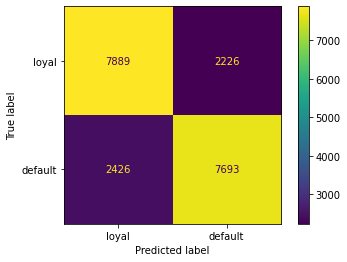

time: 199 ms (started: 2021-10-08 07:07:10 +00:00)


In [28]:
plot_confusion_matrix(gs_dt,
                      X_test,
                      y_test,
                      values_format='d',
                      display_labels=['loyal','default'])

Cara baca Confusion Matrix di atas:
- True Positive = 7693 (sebenarnya defaulter, diprediksi sebagai defaulter)
- False Positive = 2226 (sebenarnya bukan defaulter, diprediksi sebagai defaulter)
- True Negative = 7889 (sebenarnya bukan defaulter, diprediksi sebagai bukan defaulter)
- False Negative = 2426 (sebenarnya defaulter, diprediksi sebagai bukan defaulter)

### K-NEAREST NEIGHBOR

In [29]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_proba = knn.predict_proba(X_test)
y_proba = y_proba[:,1]
eval_classification(knn, y_pred, y_proba, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.77
Precision (Test Set): 0.73
Recall (Test Set): 0.87
F1-Score (Test Set): 0.80
AUC: 0.79
time: 3 s (started: 2021-10-08 07:07:14 +00:00)


In [30]:
print('Train score: ' + str(knn.score(X_train, y_train))) #accuracy
print('Test score:' + str(knn.score(X_test, y_test))) #accuracy

Train score: 0.9719974581656429
Test score:0.7746861717900564
time: 5.08 s (started: 2021-10-08 07:07:21 +00:00)


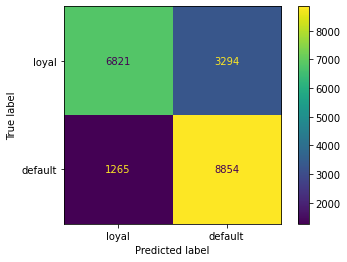

time: 1.83 s (started: 2021-10-08 07:14:04 +00:00)


In [32]:
plot_confusion_matrix(knn,
                      X_test,
                      y_test,
                      values_format='d',
                      display_labels=['loyal','default'])

Cara baca Confusion Matrix di atas:
- True Positive = 8854 (sebenarnya defaulter, diprediksi sebagai defaulter)
- False Positive = 3294 (sebenarnya bukan defaulter, diprediksi sebagai defaulter)
- True Negative = 6821 (sebenarnya bukan defaulter, diprediksi sebagai bukan defaulter)
- False Negative = 1265 (sebenarnya defaulter, diprediksi sebagai bukan defaulter)

#### TUNING HYPERPARAMETER - KNN

In [33]:
hyperparameters = dict(n_neighbors=[2],
                       weights=['distance'],
                       algorithm=['auto', 'ball_tree', 'kd_tree', 'brute']
                      )

knn = KNeighborsClassifier()
gs_knn = GridSearchCV(knn, hyperparameters, cv=5, scoring='recall')
gs_knn.fit(X_train, y_train)

y_pred = gs_knn.predict(X_test)
y_proba = gs_knn.predict_proba(X_test)
y_proba = y_proba[:,1]
eval_classification(gs_knn, y_pred, y_proba, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.74
Precision (Test Set): 0.67
Recall (Test Set): 0.95
F1-Score (Test Set): 0.78
AUC: 0.80
time: 33.5 s (started: 2021-10-08 07:14:12 +00:00)


In [34]:
show_best_hyperparameter(gs_knn.best_estimator_, hyperparameters)

Best n_neighbors: 2
Best weights: distance
Best algorithm: auto
time: 4.36 ms (started: 2021-10-08 07:14:51 +00:00)


In [35]:
print('Train score: ' + str(gs_knn.score(X_train, y_train)))
print('Test score:' + str(gs_knn.score(X_test, y_test)))

Train score: 1.0
Test score:0.9452515070659157
time: 3.14 s (started: 2021-10-08 07:14:54 +00:00)


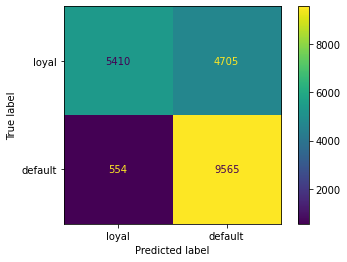

time: 1.21 s (started: 2021-10-08 07:14:59 +00:00)


In [36]:
plot_confusion_matrix(gs_knn,
                      X_test,
                      y_test,
                      values_format='d',
                      display_labels=['loyal','default'])

Cara baca Confusion Matrix di atas:
- True Positive = 9565 (sebenarnya defaulter, diprediksi sebagai defaulter)
- False Positive = 4705 (sebenarnya bukan defaulter, diprediksi sebagai defaulter)
- True Negative = 5410 (sebenarnya bukan defaulter, diprediksi sebagai bukan defaulter)
- False Negative = 554 (sebenarnya defaulter, diprediksi sebagai bukan defaulter)

-------

### **DROP SOME FEATURES** - no profession

In [37]:
train.columns

Index(['age', 'experience', 'marital_status', 'car_ownership',
       'current_job_yrs', 'current_house_yrs', 'income_norm',
       'house_ownership_norent_noown', 'house_ownership_owned',
       'house_ownership_rented', 'profession_assistant_science_engineering',
       'profession_business_administration', 'profession_firefighter',
       'profession_government', 'profession_health',
       'profession_hotel_manager', 'profession_individual_business_personnel',
       'profession_information_communication_technology',
       'profession_law_social_culture', 'profession_military_and_police',
       'profession_science_engineering', 'profession_secretary',
       'state_andhra pradesh', 'state_bihar', 'state_madhya pradesh',
       'state_maharashtra', 'state_other', 'state_tamil nadu',
       'state_uttar pradesh', 'state_west bengal', 'risk_flag'],
      dtype='object')

time: 4.99 ms (started: 2021-10-08 07:15:05 +00:00)


In [38]:
drop1 = train.drop(columns=['profession_assistant_science_engineering',
       'profession_business_administration', 'profession_firefighter',
       'profession_government', 'profession_health',
       'profession_hotel_manager', 'profession_individual_business_personnel',
       'profession_information_communication_technology',
       'profession_law_social_culture', 'profession_military_and_police',
       'profession_science_engineering', 'profession_secretary'])

drop1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67444 entries, 0 to 67443
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           67444 non-null  int64  
 1   experience                    67444 non-null  int64  
 2   marital_status                67444 non-null  int64  
 3   car_ownership                 67444 non-null  int64  
 4   current_job_yrs               67444 non-null  int64  
 5   current_house_yrs             67444 non-null  int64  
 6   income_norm                   67444 non-null  float64
 7   house_ownership_norent_noown  67444 non-null  int64  
 8   house_ownership_owned         67444 non-null  int64  
 9   house_ownership_rented        67444 non-null  int64  
 10  state_andhra pradesh          67444 non-null  int64  
 11  state_bihar                   67444 non-null  int64  
 12  state_madhya pradesh          67444 non-null  int64  
 13  s

In [39]:
xdrop1 = drop1.drop(columns=['risk_flag'])
ydrop1 = drop1['risk_flag']
 
Xdrop1_train, Xdrop1_test, ydrop1_train, ydrop1_test = train_test_split(xdrop1, ydrop1, test_size = 0.3, random_state = 42)

time: 23 ms (started: 2021-10-08 07:15:12 +00:00)


In [40]:
def eval_classification(model, pred, proba, Xdrop1_train, ydrop1_train, Xdrop1_test, ydrop1_test):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ydrop1_test, pred))
    print("Precision (Test Set): %.2f" % precision_score(ydrop1_test, pred))
    print("Recall (Test Set): %.2f" % recall_score(ydrop1_test, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ydrop1_test, pred))
    
    fpr, tpr, thresholds = roc_curve(ydrop1_test, proba, pos_label=1)
    print("AUC: %.2f" % auc(fpr, tpr))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=xdrop1.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

time: 14.2 ms (started: 2021-10-08 07:15:16 +00:00)


### DECISION TREE (NO PROFESSION)

In [41]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(Xdrop1_train, ydrop1_train)

y_pred = dt.predict(Xdrop1_test)
y_proba = dt.predict_proba(Xdrop1_test)
y_proba = y_proba[:,1]

eval_classification(dt, y_pred, y_proba, Xdrop1_train, ydrop1_train, Xdrop1_test, ydrop1_test)

Accuracy (Test Set): 0.73
Precision (Test Set): 0.72
Recall (Test Set): 0.75
F1-Score (Test Set): 0.74
AUC: 0.73
time: 321 ms (started: 2021-10-08 07:15:19 +00:00)


In [42]:
print('Train score: ' + str(dt.score(Xdrop1_train, ydrop1_train))) #accuracy
print('Test score:' + str(dt.score(Xdrop1_test, ydrop1_test))) #accuracy

Train score: 1.0
Test score:0.7283285558960166
time: 35.8 ms (started: 2021-10-08 07:15:22 +00:00)


Text(0.5, 1.0, 'feature importance score')

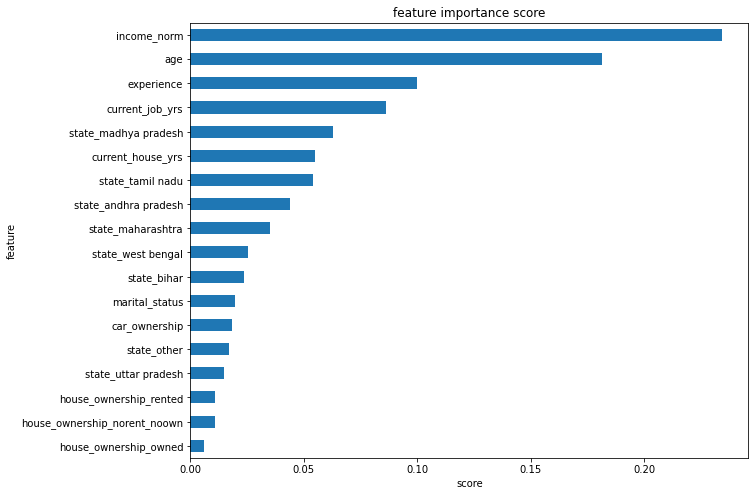

time: 298 ms (started: 2021-10-08 07:15:24 +00:00)


In [43]:
feat_importances = pd.Series(dt.feature_importances_, index=xdrop1.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

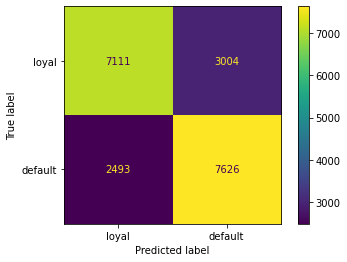

time: 198 ms (started: 2021-10-08 07:15:30 +00:00)


In [44]:
plot_confusion_matrix(dt,
                      Xdrop1_test,
                      ydrop1_test,
                      values_format='d',
                      display_labels=['loyal','default'])

Cara baca Confusion Matrix di atas:
- True Positive = 7626 (sebenarnya defaulter, diprediksi sebagai defaulter)
- False Positive = 3004 (sebenarnya bukan defaulter, diprediksi sebagai defaulter)
- True Negative = 7111 (sebenarnya bukan defaulter, diprediksi sebagai bukan defaulter)
- False Negative = 2493 (sebenarnya defaulter, diprediksi sebagai bukan defaulter)

#### TUNING HYPERPARAMATER - DT (NO PROFESSION)

In [45]:
hyperparameters = dict(criterion=['gini'],
                       splitter=['best'],
                       max_depth=[int(x) for x in np.linspace(start = 10, stop = 20, num =11)]
                      )

dt = DecisionTreeClassifier(random_state=42)
gs_dt = GridSearchCV(dt, hyperparameters, cv=5, scoring='recall')
gs_dt.fit(Xdrop1_train, ydrop1_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini'],
                         'max_de

time: 10.1 s (started: 2021-10-08 07:15:34 +00:00)


In [46]:
y_pred = gs_dt.predict(Xdrop1_test)
y_proba = gs_dt.predict_proba(Xdrop1_test)
y_proba = y_proba[:,1]

eval_classification(gs_dt, y_pred, y_proba, Xdrop1_train, ydrop1_train, Xdrop1_test, ydrop1_test)

Accuracy (Test Set): 0.72
Precision (Test Set): 0.71
Recall (Test Set): 0.75
F1-Score (Test Set): 0.73
AUC: 0.76
time: 54.4 ms (started: 2021-10-08 07:15:48 +00:00)


In [47]:
show_best_hyperparameter(gs_dt.best_estimator_, hyperparameters)

Best criterion: gini
Best splitter: best
Best max_depth: 20
time: 2.32 ms (started: 2021-10-08 07:15:52 +00:00)


In [48]:
print('Train score: ' + str(gs_dt.score(Xdrop1_train, ydrop1_train)))
print('Test score:' + str(gs_dt.score(Xdrop1_test, ydrop1_test)))

Train score: 0.9188238783205525
Test score:0.7540270777744836
time: 55.2 ms (started: 2021-10-08 07:15:54 +00:00)


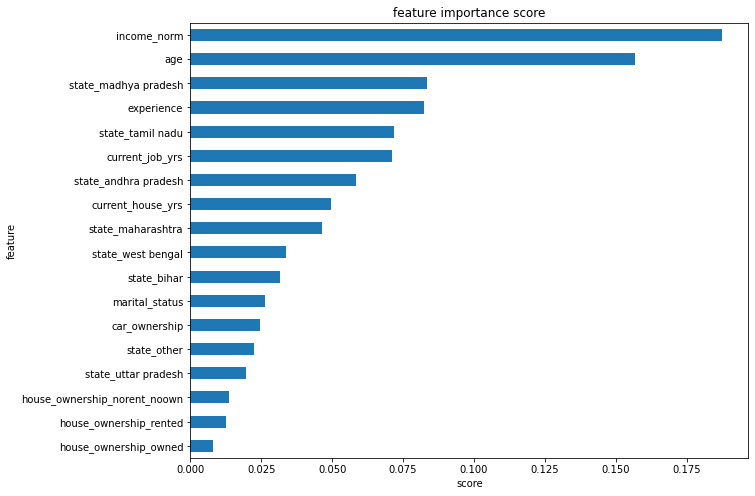

time: 293 ms (started: 2021-10-08 07:15:55 +00:00)


In [49]:
show_feature_importance(gs_dt.best_estimator_)

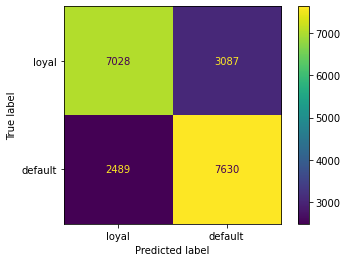

time: 202 ms (started: 2021-10-08 07:16:03 +00:00)


In [50]:
plot_confusion_matrix(gs_dt,
                      Xdrop1_test,
                      ydrop1_test,
                      values_format='d',
                      display_labels=['loyal','default'])

Cara baca Confusion Matrix di atas:
- True Positive = 7630 (sebenarnya defaulter, diprediksi sebagai defaulter)
- False Positive = 3087 (sebenarnya bukan defaulter, diprediksi sebagai defaulter)
- True Negative = 7028 (sebenarnya bukan defaulter, diprediksi sebagai bukan defaulter)
- False Negative = 2489 (sebenarnya defaulter, diprediksi sebagai bukan defaulter)

### K-NEAREST NEIGHBOR (NO PROFESSION)

In [51]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(Xdrop1_train, ydrop1_train)

y_pred = knn.predict(Xdrop1_test)
y_proba = knn.predict_proba(Xdrop1_test)
y_proba = y_proba[:,1]
eval_classification(knn, y_pred, y_proba, Xdrop1_train, ydrop1_train, Xdrop1_test, ydrop1_test)

Accuracy (Test Set): 0.76
Precision (Test Set): 0.75
Recall (Test Set): 0.79
F1-Score (Test Set): 0.77
AUC: 0.79
time: 1.89 s (started: 2021-10-08 07:16:07 +00:00)


In [52]:
print('Train score: ' + str(knn.score(Xdrop1_train, ydrop1_train))) #accuracy
print('Test score:' + str(knn.score(Xdrop1_test, ydrop1_test))) #accuracy

Train score: 0.9505613217538657
Test score:0.7610951863200554
time: 3.57 s (started: 2021-10-08 07:16:12 +00:00)


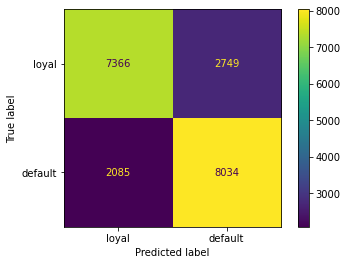

time: 1.35 s (started: 2021-10-08 07:16:18 +00:00)


In [53]:
plot_confusion_matrix(knn,
                      Xdrop1_test,
                      ydrop1_test,
                      values_format='d',
                      display_labels=['loyal','default'])

Cara baca Confusion Matrix di atas:
- True Positive = 8034 (sebenarnya defaulter, diprediksi sebagai defaulter)
- False Positive = 2749 (sebenarnya bukan defaulter, diprediksi sebagai defaulter)
- True Negative = 7366 (sebenarnya bukan defaulter, diprediksi sebagai bukan defaulter)
- False Negative = 2085 (sebenarnya defaulter, diprediksi sebagai bukan defaulter)

#### TUNING HYPERPARAMETER - KNN (NO PROFESSION)

In [54]:
hyperparameters = dict(n_neighbors=[2],
                       weights=['distance'],
                       algorithm=['auto', 'ball_tree', 'kd_tree', 'brute']
                      )

knn = KNeighborsClassifier()
gs_knn = GridSearchCV(knn, hyperparameters, cv=5, scoring='recall')
gs_knn.fit(Xdrop1_train, ydrop1_train)

y_pred = gs_knn.predict(Xdrop1_test)
y_proba = gs_knn.predict_proba(Xdrop1_test)
y_proba = y_proba[:,1]
eval_classification(gs_knn, y_pred, y_proba, Xdrop1_train, ydrop1_train, Xdrop1_test, ydrop1_test)

Accuracy (Test Set): 0.75
Precision (Test Set): 0.69
Recall (Test Set): 0.90
F1-Score (Test Set): 0.78
AUC: 0.80
time: 26.3 s (started: 2021-10-08 07:16:26 +00:00)


In [55]:
show_best_hyperparameter(gs_knn.best_estimator_, hyperparameters)

Best n_neighbors: 2
Best weights: distance
Best algorithm: auto
time: 5.13 ms (started: 2021-10-08 07:16:56 +00:00)


In [56]:
print('Train score: ' + str(gs_knn.score(Xdrop1_train, ydrop1_train)))
print('Test score:' + str(gs_knn.score(Xdrop1_test, ydrop1_test)))

Train score: 1.0
Test score:0.9025595414566657
time: 1.76 s (started: 2021-10-08 07:16:59 +00:00)


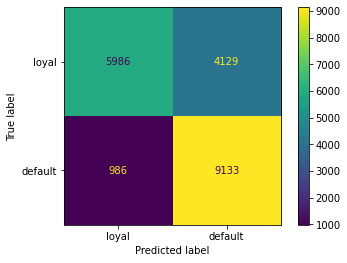

time: 770 ms (started: 2021-10-08 07:17:03 +00:00)


In [57]:
plot_confusion_matrix(gs_knn,
                      Xdrop1_test,
                      ydrop1_test,
                      values_format='d',
                      display_labels=['loyal','default'])

Cara baca Confusion Matrix di atas:
- True Positive = 9133 (sebenarnya defaulter, diprediksi sebagai defaulter)
- False Positive = 4129 (sebenarnya bukan defaulter, diprediksi sebagai defaulter)
- True Negative = 5986 (sebenarnya bukan defaulter, diprediksi sebagai bukan defaulter)
- False Negative = 986 (sebenarnya defaulter, diprediksi sebagai bukan defaulter)